In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [2]:
## Load the DataSet
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Preprocess the data
- Drop Irrelevant Features

In [5]:
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Encodeing Technique Lable Encoder

In [6]:
### Encode Categorical Variables
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


Using label encoding for categorical features like "Geography" in ANN can cause issues because it assigns ordinal relationships (e.g., `France=0`, `Spain=1`, `Germany=2`), which the ANN interprets as numerical hierarchy, leading to bias.

### **Solution: Use One-Hot Encoding**
One-hot encoding avoids this issue by creating binary columns for each category, ensuring the model treats all categories equally.

#### **Example Code:**
```python
# One-Hot Encoding for Geography
df_encoded = pd.get_dummies(df, columns=['Geography'], drop_first=True)
```

This ensures no ordinal bias and improves ANN performance.

In [7]:
### One Hot Encode Geography column
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo = OneHotEncoder()
geo_encoder = onehot_encoder_geo.fit_transform(data[['Geography']]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [8]:
# geo_encoder.toarray()

In [9]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [10]:
geo_encoded_df=pd.DataFrame(geo_encoder,columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


#### Combine OneHotEncoded columns with the original data

In [11]:
data = pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


#### Save the pickle file (Encoders and Scaler)

In [12]:
with open('lable_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)

In [13]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


### Let's plot some graph and see the relationship between features

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

### **1. Distribution of `Exited` (Target Variable)**

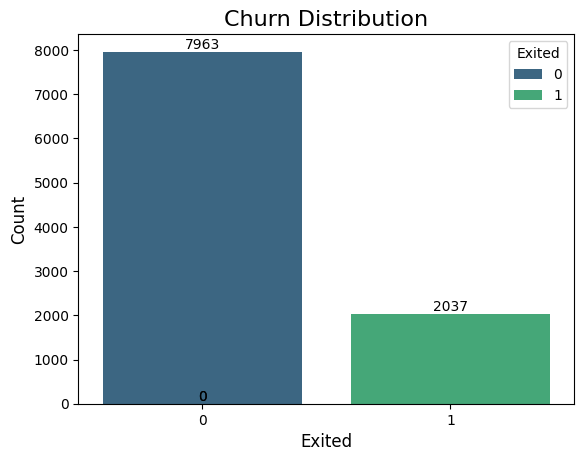

In [15]:
# Visualize Target Distribution with Colors and Values
ax = sns.countplot(x='Exited', hue='Exited', data=data, palette='viridis')  # Replace 'Churn' with your target column
plt.title("Churn Distribution", fontsize=16)
plt.xlabel("Exited", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add values on top of bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height() + 0.5,            # Y-coordinate
        int(bar.get_height()),             # Value
        ha='center', va='bottom', fontsize=10
    )

plt.show()


#### Conclusions:
- **Class Imbalance:** The distribution shows whether there is an imbalance between the churned (Exited = 1) and non-churned (Exited = 0) customers. A large disparity may suggest the need for resampling techniques like SMOTE or undersampling for model balancing.
- **Customer Retention:** If most customers fall under `Exited = 0`, it may indicate good customer retention, and marketing efforts may focus on maintaining existing customers.

---

### **2. Boxplot for Numerical Features**

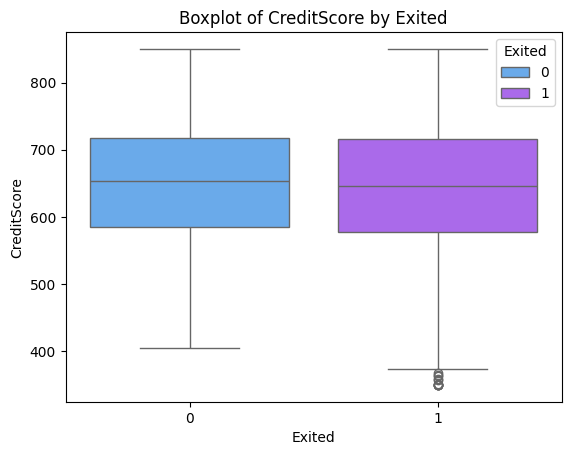

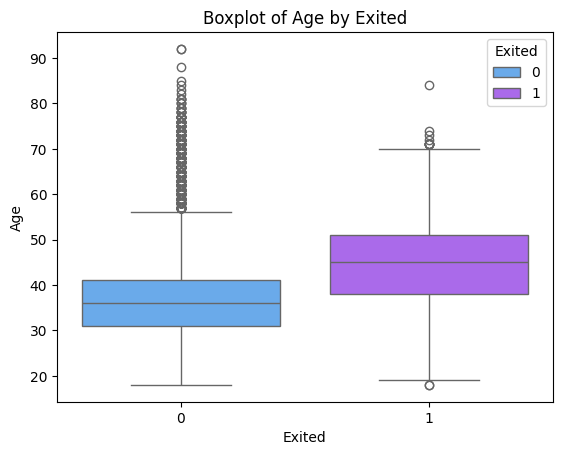

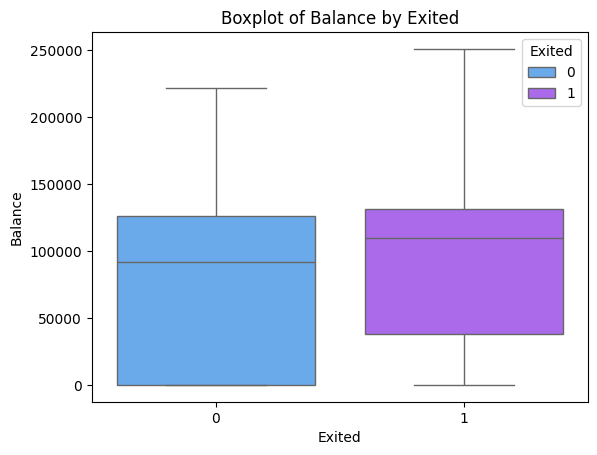

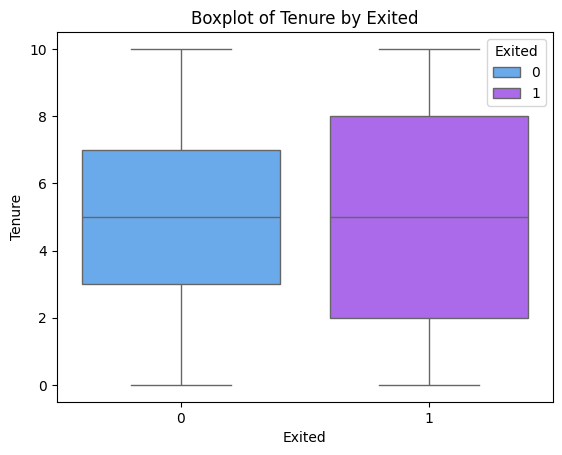

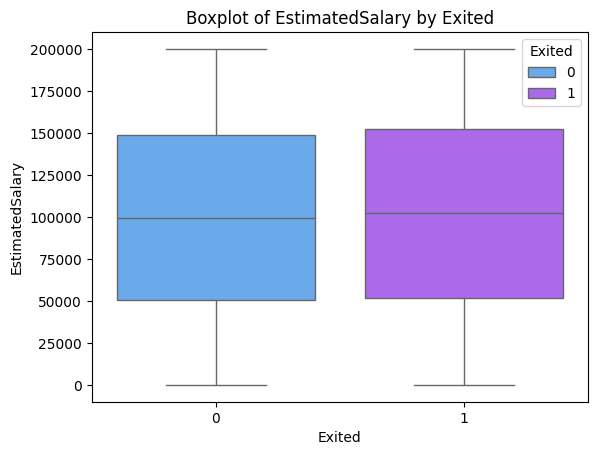

In [16]:
# Boxplot for numerical features against 'Exited'
numerical_features = ['CreditScore', 'Age', 'Balance', 'Tenure', 'EstimatedSalary']
for feature in numerical_features:
    sns.boxplot(x='Exited', y=feature,hue='Exited', data=data, palette='cool')
    plt.title(f"Boxplot of {feature} by Exited")
    plt.show()


#### Conclusions:
- **`CreditScore`:** Higher credit scores may correlate with lower churn, suggesting that customers with better creditworthiness are less likely to leave.
- **`Age`:** Younger customers may have a higher churn rate, potentially due to shifting preferences or financial instability.
- **`Balance`:** Customers with low balances may be more likely to churn, indicating that wealthier customers are more likely to stay.
- **`Tenure`:** Shorter tenure may indicate higher churn, as newer customers may be more likely to exit.
- **`EstimatedSalary`:** Lower salary ranges may correlate with higher churn, potentially indicating that higher-income customers are more likely to stay.

---

### **3. Countplot for Categorical Features**

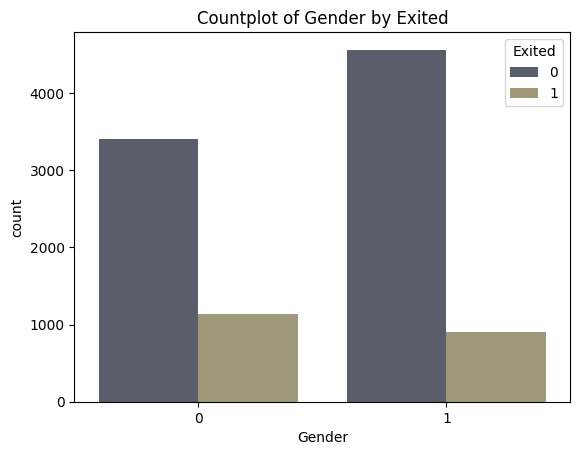

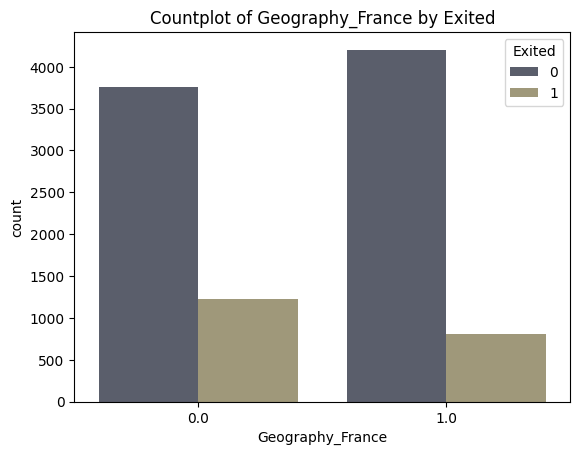

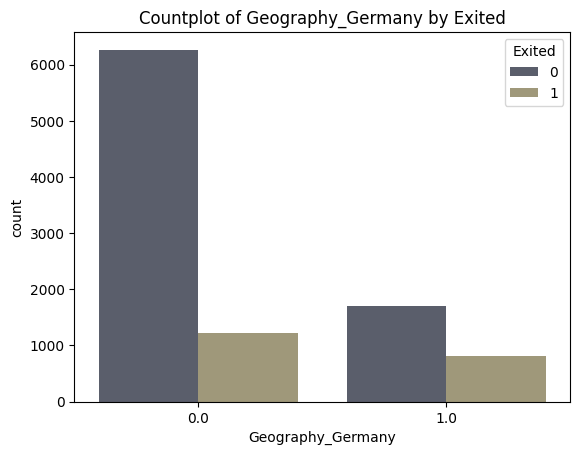

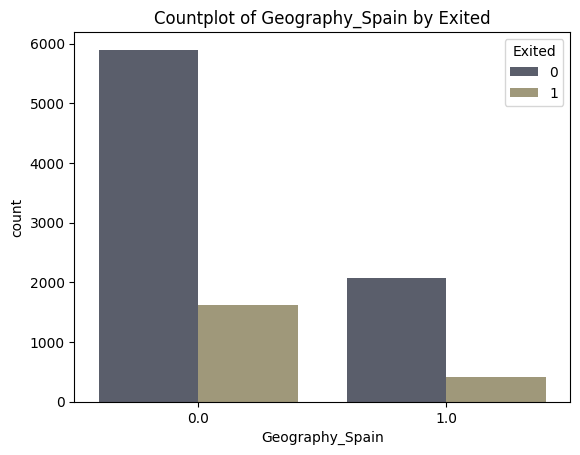

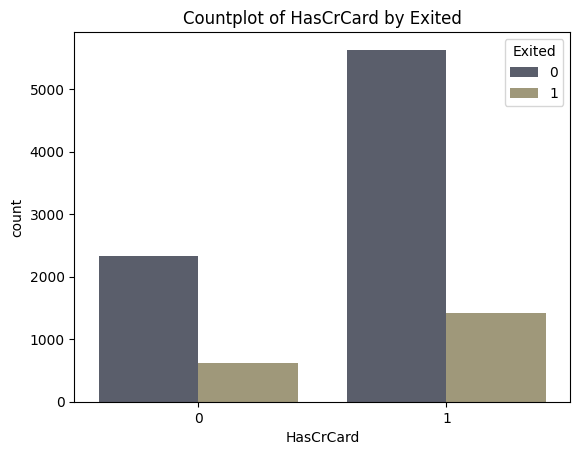

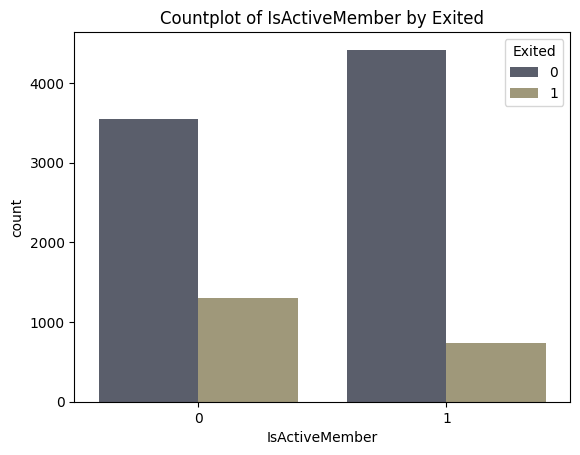

In [17]:
# Countplot for categorical features against 'Exited'
categorical_features = ['Gender', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'HasCrCard', 'IsActiveMember']
for feature in categorical_features:
    sns.countplot(x=feature, hue='Exited', data=data, palette='cividis')
    plt.title(f"Countplot of {feature} by Exited")
    plt.show()


#### Conclusions:
- **`Gender`:** There may be no significant difference between male and female customers in terms of churn if the distribution is similar for both groups.
- **`Geography`:** Customers from `Geography_France` or `Geography_Spain` may show higher churn rates compared to `Geography_Germany`, suggesting that regional factors or service offerings may influence customer retention.
- **`HasCrCard`:** Customers without a credit card (`HasCrCard = 0`) could exhibit higher churn, as access to credit may be an indicator of loyalty and engagement.
- **`IsActiveMember`:** Non-active members (`IsActiveMember = 0`) may have a much higher churn rate, indicating that engagement with the company is crucial for customer retention.

---

### **4. Correlation Matrix of Numerical Features**

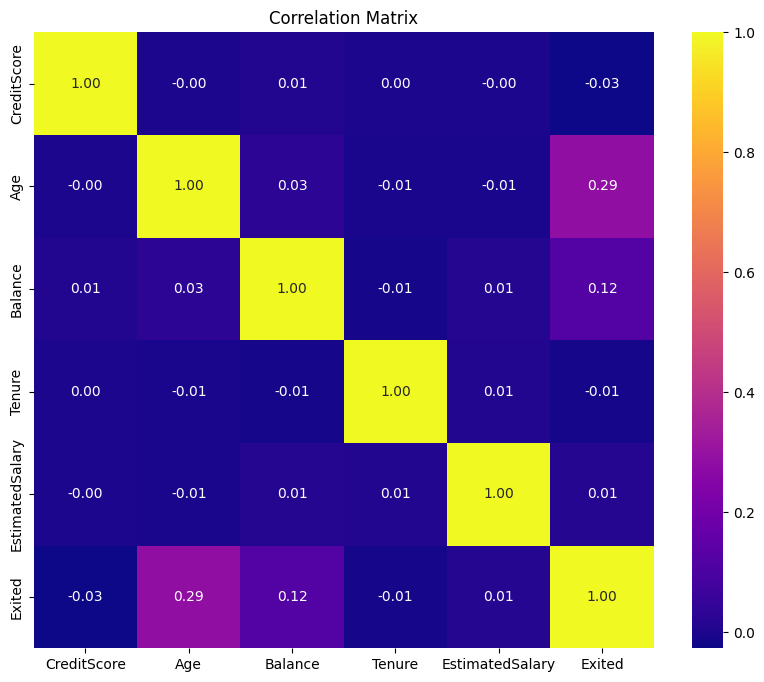

In [18]:
# Correlation matrix for numerical features
corr_matrix = data[numerical_features + ['Exited']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

#### Conclusions:
- **`CreditScore` and `Balance`:** A strong positive correlation might indicate that customers with higher credit scores tend to have higher balances, which may be linked to lower churn rates.
- **`Tenure` and `Age`:** A slight negative correlation might indicate that younger customers have shorter tenures, leading to higher churn.
- **`Balance` and `Exited`:** If the correlation is negative, it might suggest that customers with higher balances are less likely to churn.

---

### **5. Pairplot to Visualize Relationships Between Features**

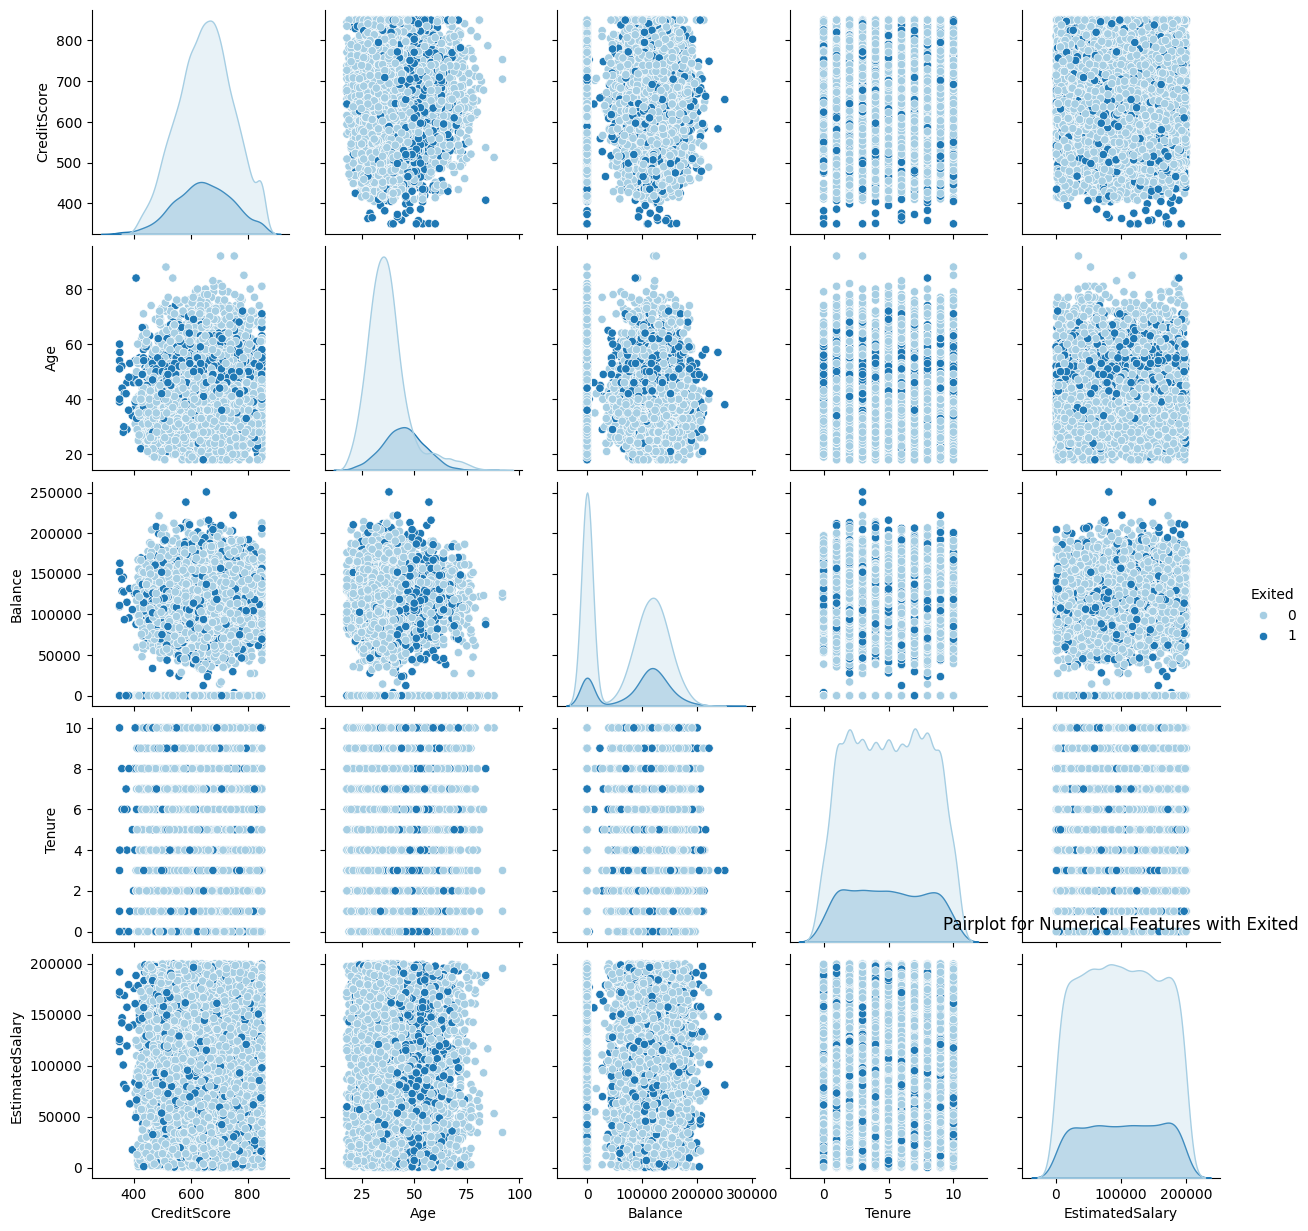

In [19]:
sns.pairplot(data[numerical_features + ['Exited']], hue='Exited', palette='Paired')
plt.title("Pairplot for Numerical Features with Exited")
plt.show()

#### Conclusions:
- **Clusters for Churned and Non-churned:** Visual clusters might indicate that certain numerical features group customers based on their churn behavior. For example, customers with higher `Balance` and `CreditScore` might form a distinct cluster for non-churned customers.
- **Feature Relationships:** The pairplot can help detect any linear or non-linear relationships between features that can be useful for feature engineering.

---

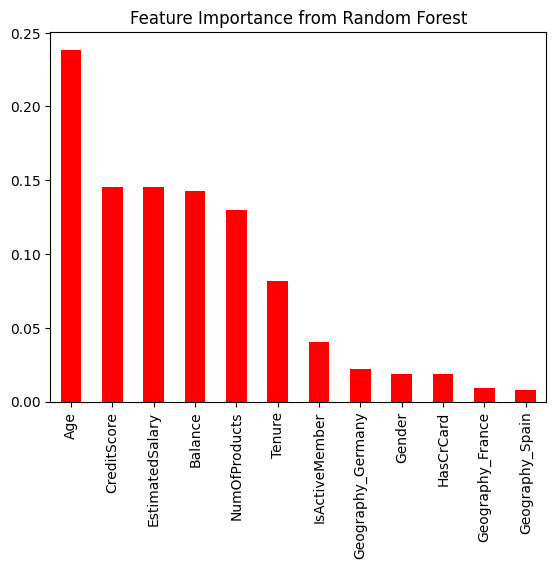

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Model for feature importance
X = data.drop(columns=['Exited'])
y = data['Exited']

rf = RandomForestClassifier()
rf.fit(X, y)

# Plot feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', color='red')
plt.title("Feature Importance from Random Forest")
plt.show()

#### Conclusions:
- **Top Features:** Features such as `Balance`, `CreditScore`, `Tenure`, and `IsActiveMember` might emerge as the most important predictors of churn, which could guide future marketing and retention strategies.
- **Low Importance Features:** Features like `Gender` or `Geography_Spain` might show lower importance, suggesting that they don't significantly impact churn compared to other features.

---

### **Summary of Insights:**

1. **Customer Demographics:** Customers with high credit scores, long tenure, and higher balances are less likely to churn, while younger customers with shorter tenure tend to have higher churn rates.
2. **Geography:** Regional differences (e.g., France vs. Germany) may impact churn, suggesting that localized factors affect customer retention.
3. **Engagement:** Active members and customers with credit cards are less likely to churn, highlighting the importance of customer engagement and access to financial services.

---

### Divide the Dataset into Independent and Dependent Features

In [21]:
X = data.drop('Exited',axis=1)
y = data['Exited']

### Split the data into independent and Dependent Features

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [23]:
X_train.shape[1]

12

### Scale down the features 

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [25]:
# X_train

### Save the pickle file 

In [26]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

### ANN Implementation

In [27]:
# import all the Necessory libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
# inside Tuple 
(X_train.shape[1],) # It is single dimension and it has 12 inputs (IP)

(12,)

In [30]:
## Build Our ANN Model
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), # HL1: connected with Input Layer
    Dense(32,activation='relu'), # HL2:
    Dense(1,activation='sigmoid') # OutPut Layer  
]
)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss = tensorflow.keras.losses.BinaryCrossentropy()

In [33]:
## Compile the model One way to compile the model
## Adam optimizer has its onwn learning rate but we can inetialize our own learning rate for adam by above code
# model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
# another way to compilt the model
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
## Setup the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir = "logs/fit/" + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [36]:
### Setup Early Stopping
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights='True')

In [37]:
### Training the Model
history=model.fit(
    X_train, y_train, validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100


250/250 [==============================] - 2s 5ms/step - loss: 0.4060 - accuracy: 0.8322 - val_loss: 0.3560 - val_accuracy: 0.8490
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3568 - accuracy: 0.8531 - val_loss: 0.3547 - val_accuracy: 0.8565
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3501 - accuracy: 0.8550 - val_loss: 0.3454 - val_accuracy: 0.8660
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3431 - accuracy: 0.8590 - val_loss: 0.3416 - val_accuracy: 0.8620
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3402 - accuracy: 0.8626 - val_loss: 0.3404 - val_accuracy: 0.8570
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.8596 - val_loss: 0.3464 - val_accuracy: 0.8615
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3374 - accuracy: 0.8621 - val_loss: 0.3426 - val_accuracy: 0.85

In [ ]:
### Save the model 
model.save('model.h5')

In [39]:
### Let's Load Tensor Board Extenstion
%load_ext tensorboard


In [40]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 20284), started 0:42:36 ago. (Use '!kill 20284' to kill it.)